# Experiment 1: Update rule taken from Olfati-Saber2007 #

## Strongly connected, global broadcast, sync., no time-delay ##
Protocol is taken from Olfati-Saber2007
The simple case, agents are randomly distributed in the beginning, the network is strongly connected.
Consensus protocol:
$\dot{x}_i=\sum_{j\in \mathrm{N}_i}(x_j-x_i)+b_i$

In [18]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# animation
#from time import sleep
import tempfile
import os
import shutil

# Parameters
t_step = 0.005
N = 10
threshold_convergence = 0.01

# Complete Graph
G=nx.random_geometric_graph(N,2)
pos=nx.get_node_attributes(G,'pos')

# Prepare Animation
directory_name = tempfile.mkdtemp()

# Prepare Figure
#plt.ion()
#fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
#plt.axis('off')
plt.hold = False

# Simulation
it = 0
converged = False
while it<=300 and not converged:
    # Draw Current State
    nx.draw_networkx_edges(G,pos,alpha=0.4,ax=ax)
    nx.draw_networkx_nodes(G,pos,ax=ax)
    buf = "Olfati-Saber2007 - time-step=%03d" % it
    plt.title(buf)
    
    # Save image in temp folder
    buf = "%s/%05d.png" % (directory_name,it)
    fig.savefig(buf)
    ax.cla()
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    #plt.axis('off')

    # Calculate delta for this iteration, according to the protocol
    G_node_iter = G.nodes_iter()
    new_pos = dict()
    converged = True
    for node in G_node_iter:
        sum = 0;
        for neighbor in nx.all_neighbors(G,node):
            sum += np.array(pos[neighbor])-np.array(pos[node])
        if np.dot(sum,sum)>=threshold_convergence:
            converged = False
        new_node_pos = np.array(pos[node]) + sum*t_step
        new_pos[node] = new_node_pos.tolist()
    
    #nx.set_node_attributes(G,'pos',{node:new_pos}) # single adjustment
    # Update whole graph at once
    nx.set_node_attributes(G,'pos',new_pos)
    pos=new_pos
    it += 1
plt.close()

# make video
buf = "avconv -r 20 -an -i \"%s/%%05d.png\" -vcodec libx264 -pix_fmt yuv420p -y vids/exp1a.mp4" % directory_name
os.system(buf)

# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

# Clean-up
shutil.rmtree(directory_name)

video("vids/exp1a.mp4", "mp4")

Just show video 1a

In [19]:
# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

video("vids/exp1a.mp4", "mp4")

## Random graph, local broadcast gossip, sync., rewired, links can break ##
Update rule taken from Olfati-Saber2007

Locally connected with automatic rewiring, same update rule

In [20]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# animation
import tempfile
import os
import shutil

# Parameters
N =100
radius = 0.2
t_step = 0.98/N
threshold_convergence = 0.001

# Complete Graph
G=nx.random_geometric_graph(N,radius)
pos=nx.get_node_attributes(G,'pos')

# Prepare Animation
directory_name = tempfile.mkdtemp()

# Prepare Figure
#plt.ion()
#fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
#plt.axis('off')
plt.hold = False

# Simulation
it = 0
converged = False
while it<=500 and not converged:
    # Draw Current State
    nx.draw_networkx_edges(G,pos,alpha=0.4,ax=ax)
    nx.draw_networkx_nodes(G,pos,ax=ax)

    buf = "Olfati-Saber2007 - time-step=%03d" % it
    plt.title(buf)
    
    # Save image in temp folder
    buf = "%s/%05d.png" % (directory_name,it)
    fig.savefig(buf)
    ax.cla()
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    #plt.axis('off')

    # Calculate delta for this iteration, according to the protocol
    new_pos = dict()
    converged = True
    G_node_iter = G.nodes_iter()
    for node1 in range(0,N):
        sum = 0;
        for node2 in range(0,N):
            if node1!=node2:
                dist_vector = np.array(pos[node2])-np.array(pos[node1])
                if np.linalg.norm(dist_vector)<=radius:
                    G.add_edge(node1,node2) # add egde if it's close
                    sum += np.array(pos[node2])-np.array(pos[node1])
                    if np.dot(sum,sum)>=threshold_convergence:
                        converged = False
                else:
                    if G.has_edge(node1,node2):
                        G.remove_edge(node1,node2) # remove egde if it's far
        
        new_node_pos = np.array(pos[node1]) + sum*t_step
        new_pos[node1] = new_node_pos.tolist()
    
    #nx.set_node_attributes(G,'pos',{node:new_pos}) # single adjustment
    # Update whole graph at once
    nx.set_node_attributes(G,'pos',new_pos)
    pos=new_pos
    it += 1
plt.close()

# make video
buf = "avconv -r 20 -an -i \"%s/%%05d.png\" -vcodec libx264 -pix_fmt yuv420p -y vids/exp1b.mp4" % directory_name
os.system(buf)

# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

# Clean-up
shutil.rmtree(directory_name)

video("vids/exp1b.mp4", "mp4")

Just show video 1b

In [21]:
# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

video("vids/exp1b.mp4", "mp4")

# Experiment 2: Based on XiaoWang2008 (Section 4.1) #

## Random graph, local broadcast gossip, sync., links break ##
case that is not covered by theorems, does not allow consensus
$$\dot{x}_i(t)=-x_i(t)+\sum_{j\in N_i}\mathbf{a}_{ij}x_j(t_k), \text{ if }N_i!=0$$
$$\dot{x}_i(t)=0, \text{ if }N_i=0$$
Connections can break, thats not covered by the theorems, which assume that all nodes are strongly connected as $t\to\inf$

In [22]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# animation
import tempfile
import os
import shutil

# Parameters
N =100
radius = 0.2
t_step = 0.1
threshold_convergence = 0.001

# Complete Graph
G=nx.random_geometric_graph(N,radius)
pos=nx.get_node_attributes(G,'pos')

# Prepare Animation
directory_name = tempfile.mkdtemp()

# Prepare Figure
#plt.ion()
#fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
#plt.axis('off')
plt.hold = False

# Simulation
it = 0
converged = False
while it<=100 and not converged:
    # Draw Current State
    nx.draw_networkx_edges(G,pos,alpha=0.4,ax=ax)
    nx.draw_networkx_nodes(G,pos,ax=ax)

    buf = "XiaoWang2008 - time-step=%03d" % it
    plt.title(buf)
    
    # Save image in temp folder
    buf = "%s/%05d.png" % (directory_name,it)
    fig.savefig(buf)
    ax.cla()
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    #plt.axis('off')

    # Calculate delta for this iteration, according to the protocol
    new_pos = dict()
    converged = True
    G_node_iter = G.nodes_iter()
    for node in range(0,N):
        sum = np.array([0.,0.])
        numOfNeighbors = len(G.neighbors(node))
        for neighbor in G.neighbors_iter(node):
            sum += np.array(pos[neighbor])/numOfNeighbors
        if np.dot(sum,sum)>=threshold_convergence:
            converged = False
        if sum.any():
            new_node_pos = np.array(pos[node])+(-np.array(pos[node]) + sum)*t_step
        else:
            new_node_pos = np.array(pos[node])
        new_pos[node] = new_node_pos.tolist()
    
    #nx.set_node_attributes(G,'pos',{node:new_pos}) # single adjustment
    # Update whole graph at once
    nx.set_node_attributes(G,'pos',new_pos)
    pos=new_pos
    
    # Update the edges
    for node1 in range(0,N):
        for node2 in range(node1+1,N):
            dist_vector = np.array(pos[node2])-np.array(pos[node1])
            if np.linalg.norm(dist_vector)<=radius:
                G.add_edge(node1,node2) # add egde if it's close
            else:
                if G.has_edge(node1,node2):
                    G.remove_edge(node1,node2) # remove egde if it's far
    it += 1
plt.close()

# make video
buf = "avconv -r 20 -an -i \"%s/%%05d.png\" -vcodec libx264 -pix_fmt yuv420p -y vids/exp2.mp4" % directory_name
os.system(buf)

# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

# Clean-up
shutil.rmtree(directory_name)

video("vids/exp2.mp4", "mp4")

In [23]:
# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

video("vids/exp2.mp4", "mp4")

## Random Graph, local broadcast, sync., rewiring, links dont break ##
Connections never break, just more edges get added
Fang, PJ Antsaklis - American Control Conference, 2005


In [24]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# animation
import tempfile
import os
import shutil

# Parameters
N =100
radius = 0.2
t_step = 0.7
threshold_convergence = 0.001

# Complete Graph
G=nx.random_geometric_graph(N,radius)
pos=nx.get_node_attributes(G,'pos')

# Prepare Animation
directory_name = tempfile.mkdtemp()

# Prepare Figure
#plt.ion()
#fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
#plt.axis('off')
plt.hold = False

# Simulation
it = 0
converged = False
while it<=200 and not converged:
    # Draw Current State
    nx.draw_networkx_edges(G,pos,alpha=0.4,ax=ax)
    nx.draw_networkx_nodes(G,pos,ax=ax)

    buf = "XiaoWang2008 - time-step=%03d" % it
    plt.title(buf)
    
    # Save image in temp folder
    buf = "%s/%05d.png" % (directory_name,it)
    fig.savefig(buf)
    ax.cla()
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    #plt.axis('off')

    # Calculate delta for this iteration, according to the protocol
    new_pos = dict()
    converged = True
    G_node_iter = G.nodes_iter()
    for node in range(0,N):
        sum = np.array([0.,0.])
        numOfNeighbors = len(G.neighbors(node))
        for neighbor in G.neighbors_iter(node):
            sum += np.array(pos[neighbor])/numOfNeighbors

        if sum.any():
            new_node_pos = np.array(pos[node])+(-np.array(pos[node]) + sum)*t_step
            if np.linalg.norm(-np.array(pos[node]) + sum)>=threshold_convergence:
                converged = False
        else:
            new_node_pos = np.array(pos[node])
        new_pos[node] = new_node_pos.tolist()
    
    #nx.set_node_attributes(G,'pos',{node:new_pos}) # single adjustment
    # Update whole graph at once
    nx.set_node_attributes(G,'pos',new_pos)
    pos=new_pos
    
    # Update the edges
    for node1 in range(0,N):
        for node2 in range(node1+1,N):
            dist_vector = np.array(pos[node2])-np.array(pos[node1])
            if np.linalg.norm(dist_vector)<=radius:
                G.add_edge(node1,node2) # add egde if it's close
            #else:
                #if G.has_edge(node1,node2):
                #    G.remove_edge(node1,node2) # remove egde if it's far
    it += 1
plt.close()

# make video
buf = "avconv -r 20 -an -i \"%s/%%05d.png\" -vcodec libx264 -pix_fmt yuv420p -y vids/exp3.mp4" % directory_name
os.system(buf)

# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

# Clean-up
shutil.rmtree(directory_name)

video("vids/exp3.mp4", "mp4")

In [25]:
# Display of the Video
def video(fname, mimetype):
    from IPython.core.display import HTML
    import io
    import base64
    video = io.open(fname, 'r+b').read()
    video_encoded = base64.b64encode(video).decode('ascii')
    video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

video("vids/exp3.mp4", "mp4")

# Experiment 3:  Based on XiaoWant2008, asynchronous #
with DES (discrete event simulation) simpy
$$\dot{x}_i(t)=\sum_{j\in N_i}\mathbf{a}_{ij}[x_j(t-T_{ij})-x_i(t)]$$

## Graph Creation ##
A strongly connected random graph in the [0,1]x[0,1] space.

In [26]:
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import random

# Parameters
N = 5 # Agents
radius = 2 # if >sqrt(2) => all agents are linked to each other

# Dict with all the delay information bounds
delays = dict()

# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 0.300
delays['t_delay_min'] = 0.100

# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax'] = 0.100
delays['Tbufmin'] = 0.010

# Graph
G=nx.random_geometric_graph(N,radius)
#pos=nx.get_node_attributes(G,'pos')

# Weighted Edges only used if fixed_delay=True for the agent class
for edge in G.edges_iter():
    #edge['weight']=random.uniform(t_delay_min,t_delay_max)
    G[edge[0]][edge[1]]['weight']=random.uniform(delays['t_delay_min'],delays['t_delay_max'])

# Iteration Time of each Agent (node) only used if fixed_Tbuf=True for the agent class
for node in G.nodes():
    #print(node)
    G.node[node]['Tbuf']=random.uniform(delays['Tbufmin'],delays['Tbufmax'])


## Base Classes for Agent and the Logger ##

In [27]:
import simpy
import random
import numpy as np
import pdb


class Agent(object):
    def __init__(self, env, num, node, Graph,fixed_delay=True,fixed_Tbuf=True,delays=None,quite=False):
        self.env = env
        self.k = 0
        self.num = num
        self.node = node
        self.G = Graph
        self.speed = 0.1
        self.threshold_movement = 0.02
        self.quite = quite
        
        # Input Buffer
        self.ibuf = list()
        self.packets_received = 0
        self.packets_discarded = 0
        
        # fixed or bounded delays and period time
        if (not fixed_delay or not fixed_Tbuf) and delays == None:
            print("If the delay/Tbuf is not fixed, you need to provide a dict for delays={'Tbufmax'=0.3,...}")
            raise AssertionError
        self.delays = delays
        self.fixed_delay = fixed_delay
        self.fixed_Tbuf = fixed_Tbuf
        self.this_Tbuf = 1
        
        # Calculate the first Tbuf
        self.calc_timeout()
        
        # start automatically upon creation
        self.action = env.process(self.run())

    def add_package(self,package):
        self.ibuf.append(package)

    def calc_timeout(self):
        # calculate the Tbuf of this iteration
        if self.fixed_Tbuf:
            self.this_Tbuf = self.node['Tbuf'] # if fixed Tbuf, get it from the graph
        else:
            self.this_Tbuf = random.uniform(self.delays['Tbufmin'],self.delays['Tbufmax'])

    def get_current_buffer_unfiltered(self):
        # sort it
        self.ibuf = sorted(self.ibuf, key=lambda package: package['arrival_time'])
        # take packages that arrived before env.now
        current_buffer = [p for p in self.ibuf if p['arrival_time'] <= self.env.now]
        # shrink buffer, leave future-packages
        current_buffer_length = len(current_buffer)
        del self.ibuf[:current_buffer_length]
        # update the counter
        self.packets_received += current_buffer_length
 
        return current_buffer
        
    def handle_buffer(self,current_buffer,n_packages_unfiltered):
        # deal with ambigious data, throw away old data
        current_buffer_sender = sorted(current_buffer, key=lambda package: package['sender'])
        current_buffer_sender_filtered = list()
        i = 0
        while i < n_packages_unfiltered:
            sender_packages = [p for p in current_buffer_sender if p['sender'] == current_buffer_sender[i]['sender']]
            n_from_sender = len(sender_packages)
            if n_from_sender>1:
                #print('multiple packages, using the most recent one')
                #pdb.set_trace()
                newest = max(sender_packages, key=lambda p:p['time_stamp'])
                current_buffer_sender_filtered.append(newest)
            else:
                current_buffer_sender_filtered.extend(sender_packages)
            i += n_from_sender
        
        # update discarded count
        self.packets_discarded += n_packages_unfiltered-len(current_buffer_sender_filtered)
    
        return current_buffer_sender_filtered
        
    def buffer_fusion(self,current_buffer_sender_filtered):
        wsum = np.array([0.,0.])
        n_packages_filtered = len(current_buffer_sender_filtered)
        self.n_packages_filtered = n_packages_filtered
        for pkg in current_buffer_sender_filtered:
            #pdb.set_trace()
            pkg_pos = np.array(pkg['pos'])
            wsum += pkg_pos/n_packages_filtered

        if np.linalg.norm(-np.array(self.node['pos'])+wsum)>self.threshold_movement and n_packages_filtered>0:
            # get direction of movement
            dir_vec = -np.array(self.node['pos']) + wsum
            dir_vec_length = np.linalg.norm(dir_vec)
            #normalize if vector is too long, if it's shorter, it slows down as it converges
            if dir_vec_length > self.speed:
                dir_vec = dir_vec/dir_vec_length*self.speed
            #else:
            #    dir_norm_vec = dir_vec#*self.speed

            # new_pos    =          old_pos           +    direction * (time it travels)
            new_node_pos = np.array(self.node['pos']) + dir_vec *  self.this_Tbuf
        else:
            new_node_pos = np.array(self.node['pos'])
        return list(new_node_pos)
        
    def calc_new_pos(self):
        # read the buffer, sort it, deal with ambigious data
        current_buffer = self.get_current_buffer_unfiltered()
        n_packages_unfiltered = len(current_buffer)
        self.n_packages_unfiltered = n_packages_unfiltered
        #if (n_packages_unfiltered>0):
        #    pdb.set_trace()
        # Handle the Buffer (default: throw away the old data)
        current_buffer_sender_filtered = self.handle_buffer(
                                            current_buffer=current_buffer,
                                            n_packages_unfiltered=n_packages_unfiltered)

        # use the filtered buffer for the calculation of the \dot{x}_i
        return self.buffer_fusion(current_buffer_sender_filtered)

    
    def send_messages(self):
        # Talk to all, strongly connected graph
        numOfNeighbors = len(self.G.neighbors(self.num))
        for neighbor in self.G.neighbors_iter(self.num):
            # Calculate the delay for this communication, fixed or random
            if self.fixed_delay:
                delay = self.G[self.num][neighbor]['weight']
            else:
                delay = random.uniform(self.delays['t_delay_min'],self.delays['t_delay_max'])
            package = {'sender':self.num,
                       'arrival_time':self.env.now+delay,
                       'time_stamp':self.env.now,
                       'pos':self.node['pos']}
            self.env.ListOfAgents[neighbor].add_package(package)
            
    def run(self):
        yield self.env.timeout(np.spacing(1)) # wait until the beginning of the simulation
        while True:
            # 1st step: Send Messages to all adjacent Agents
            self.send_messages()
                
            # 2nd step: Caclulate the new position after the Tbuf timeout
            new_node_pos = self.calc_new_pos()

            # 3rd step: Suspend for Tbuf, the agent is moving
            #print('Agent #%02d: Internal Loop-Time %.3f (time:%.3f)' % (self.num,self.node['Tbuf'],self.env.now))
            yield self.env.timeout(self.this_Tbuf)

            # 4th step: print some information sometimes
            if np.mod(self.k,50)==0 and not self.quite:
                print('Agent #%02d step %04d Tbuf %.3f (time:%03.3f) oldpos (%.2f,%.2f) newpos (%.2f,%.2f) filtered %02d unfiltered %02d packages' % 
                      (self.num,
                       self.k,
                       self.this_Tbuf,
                       self.env.now,
                       self.node['pos'][0],
                       self.node['pos'][1],
                       new_node_pos[0],
                       new_node_pos[1],
                       self.n_packages_filtered,
                       self.n_packages_unfiltered
                      ))
            
            # 5th step: set new position
            self.node['pos'] = new_node_pos
            
            # 6th step: increment the counter
            self.k += 1


In [28]:
import tempfile
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class logger(object):
    def __init__(self,env,Graph,T=0.1,MakeVideo=True):
        self.T = T
        self.G = Graph
        self.env = env
        self.MakeVideo = MakeVideo
        
        # memory of positions, for convergence analysis
        self.mem = list()
        self.mem_t = list()
        
        # memory for package counters
        self.pkgs = list()
        self.pkgs_t = list()
        self.pkgs_disc = list()
        self.pkgs_disc_t = list()
        
        # Temporary Folder
        self.directory_name = tempfile.mkdtemp()
        self.it = 0
        
        if MakeVideo:
            # Plot
            self.fig, self.ax = plt.subplots()
            plt.xlim(-0.05,1.05)
            plt.ylim(-0.05,1.05)
            #plt.axis('off')
            plt.hold = False
        
        # Clean-up
        #video("vids/exp2.mp4", "mp4")
        
        self.action = self.env.process(self.run())

    def SaveGraph(self):
        # Draw Current State
        pos=nx.get_node_attributes(self.G,'pos')
        nx.draw_networkx_edges(self.G,pos,alpha=0.4,ax=self.ax)
        nx.draw_networkx_nodes(self.G,pos,ax=self.ax)

        buf = "Asynchronous - time=%.3f iter=%03d" % (self.env.now,self.it)
        self.ax.set_title(buf)

        # Save image in temp folder
        buf = "%s/%05d.png" % (self.directory_name,self.it)
        self.fig.savefig(buf)
        #print('Observer:',buf)
        self.ax.cla()
        plt.xlim(-0.05,1.05)
        plt.ylim(-0.05,1.05)

        self.it += 1
            
    def SavePos(self):
        pos=nx.get_node_attributes(self.G,'pos')
        self.mem.append(pos)
        self.mem_t.append(self.env.now)
        
    def ConvergencePlot(self):
        # The plots
        fig_conv, (ax_conv, ax_conv_all) = plt.subplots(2,figsize=[7,14])
        ax_conv.set_ylabel('distance to converged point')
        ax_conv_all.set_ylabel('distance to converged point')
        
        # The (converged) final position
        final_pos = self.mem[-1]
        n = len(final_pos)
        av_pos = np.array([0.0,0.0])
        for i in range(0,n):
            av_pos += np.array(final_pos[i])/n
        
        # an inline function to calculate the distance to the converged point
        dist = lambda pos: np.linalg.norm(av_pos-pos)
        
        # Prepare empty list of lists for the plot information (distance to point of convergence)
        merged = list()
        for _ in range(0,n):
            merged.append(list())
            
        # Iterate through the whole data, calc distance to av_pos
        allsum = list() # one list for all the agents summarized
        for posDict in self.mem:
            sumi = 0.0
            for i in range(0,n):
                d = dist(posDict[i])
                merged[i].append(d)
                sumi += d
            allsum.append(sumi)
        
        # Plot each Agent subplot 1
        for i in range(0,n):
            line = merged[i]
            lab = "Agent %02d" % i
            ax_conv.plot(self.mem_t,line,label=lab)
        ax_conv.legend()
        
        # plot the sum subplot 2
        ax_conv_all.plot(self.mem_t,allsum,label="all")
        ax_conv_all.legend()
        
    def PkgPlot(self):
        # The plots
        fig_conv, (ax_pkgs, ax_pkgs_disc) = plt.subplots(2,figsize=[7,14])
        ax_pkgs.set_ylabel('Number of Packages Received')
        ax_pkgs_disc.set_ylabel('Number of Packages Discarded')

        # Prepare empty list of lists for the plot information (pkgs and discarded pkgs)
        n = len(self.pkgs[-1])
        merged_pkgs = list()
        merged_pkgs_disc = list()
        for _ in range(0,n):
            merged_pkgs.append(list())
            merged_pkgs_disc.append(list())
            
        # Iterate through the whole data, merge the list of dicts to a list of lists
        for pkgDict in self.pkgs:
            for i in range(0,n):
                merged_pkgs[i].append(pkgDict[i])
        for pkgdiscDict in self.pkgs_disc:
            for i in range(0,n):
                merged_pkgs_disc[i].append(pkgdiscDict[i])
        
        # Plot each Agent number of packages subplot 1
        for i in range(0,n):
            line = merged_pkgs[i]
            lab = "Agent %02d" % i
            ax_pkgs.plot(self.pkgs_t,line,label=lab)
        ax_pkgs.legend()
        
        # plot the discarded pkgs subplot 2
        for i in range(0,n):
            line = merged_pkgs_disc[i]
            lab = "Agent %02d" % i
            ax_pkgs_disc.plot(self.pkgs_disc_t,line,label=lab)
        ax_pkgs_disc.legend()
        
    def CalculateConsensusTime(self):
        # The (converged) final position
        final_pos = self.mem[-1]
        n = len(final_pos)
        av_pos = np.array([0.0,0.0])
        for i in range(0,n):
            av_pos += np.array(final_pos[i])/n
        
        # an inline function to calculate the distance to the converged point
        dist = lambda pos: np.linalg.norm(av_pos-pos)
            
        # Iterate through the whole data, calc distance to av_pos
        allsum = list() # one list for all the agents summarized
        for posDict in self.mem:
            sumi = 0.0
            for i in range(0,n):
                d = dist(posDict[i])
                sumi += d
            allsum.append(sumi)
        
        # Threshold of consensus 5% of the difference between beginning and end
        factor = 5/100
        threshold = (allsum[0]-allsum[-1])*factor+allsum[-1]
        trigger_i = next(i for i,v in enumerate(allsum) if v <= threshold)
        #print(trigger_i,self.mem_t[trigger_i],sep='\t')
        return self.mem_t[trigger_i]

        
    def run(self):
        yield self.env.timeout(np.spacing(1)) # wait until the beginning of the simulation
        while True:
            # Plot data and save it in temporary folder
            if self.MakeVideo:
                self.SaveGraph()
            
            # Convergence Rate
            self.SavePos()
            
            # Package Counters
            self.SavePkgCounters()
            
            # Wait for T secs
            yield self.env.timeout(self.T)
    
    def SavePkgCounters(self):
        #pdb.set_trace()
        pkgs = {Agent.num:Agent.packets_received for Agent in self.env.ListOfAgents}
        pkgs_disc = {Agent.num:Agent.packets_discarded for Agent in self.env.ListOfAgents}
        self.pkgs.append(pkgs)
        self.pkgs_t.append(self.env.now)
        self.pkgs_disc.append(pkgs_disc)
        self.pkgs_disc_t.append(self.env.now)
    
    def showVideo(self, filename):
        import os
        import shutil

        # Close the plot of the observer
        plt.close(self.fig)
        
        # make video
        buf = "avconv -r 20 -an -i \"%s/%%05d.png\" -vcodec libx264 -pix_fmt yuv420p -y vids/%s.mp4" % (self.directory_name,filename)
        os.system(buf)
        
        # Clean-up
        shutil.rmtree(self.directory_name)
        
        # Display of the Video
        from IPython.core.display import HTML
        import io
        import base64
        mimetype = "mp4"
        buf = "vids/%s.mp4" % filename
        video = io.open(buf, 'r+b').read()
        video_encoded = base64.b64encode(video).decode('ascii')
        video_tag = '<video controls autoplay="autoplay" alt="video" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
        return HTML(data=video_tag)
          
    # TODO: continue here, most simple approach is to just take the currently saved node['pos'] property,
    # better would be to interpolate linearly the position
    # measure the convergence, convergence rate, packets thrown away, etc.

## DES: Quick Network, global broadcast gossip, simple Buffer ##

Agent #03 step 0000 Tbuf 0.011 (time:0.011) oldpos (0.42,0.50) newpos (0.42,0.50) filtered 00 unfiltered 00 packages
Agent #00 step 0000 Tbuf 0.022 (time:0.022) oldpos (0.59,0.71) newpos (0.59,0.71) filtered 00 unfiltered 00 packages
Agent #01 step 0000 Tbuf 0.064 (time:0.064) oldpos (0.54,0.34) newpos (0.54,0.34) filtered 00 unfiltered 00 packages
Agent #04 step 0000 Tbuf 0.070 (time:0.070) oldpos (0.91,0.08) newpos (0.91,0.08) filtered 00 unfiltered 00 packages
Agent #02 step 0000 Tbuf 0.099 (time:0.099) oldpos (0.60,1.00) newpos (0.60,1.00) filtered 00 unfiltered 00 packages
Agent #03 step 0050 Tbuf 0.011 (time:0.585) oldpos (0.43,0.51) newpos (0.44,0.51) filtered 01 unfiltered 01 packages
Agent #00 step 0050 Tbuf 0.022 (time:1.142) oldpos (0.57,0.66) newpos (0.57,0.65) filtered 02 unfiltered 05 packages
Agent #03 step 0100 Tbuf 0.011 (time:1.159) oldpos (0.46,0.52) newpos (0.46,0.52) filtered 01 unfiltered 01 packages
Agent #03 step 0150 Tbuf 0.011 (time:1.733) oldpos (0.48,0.53) n

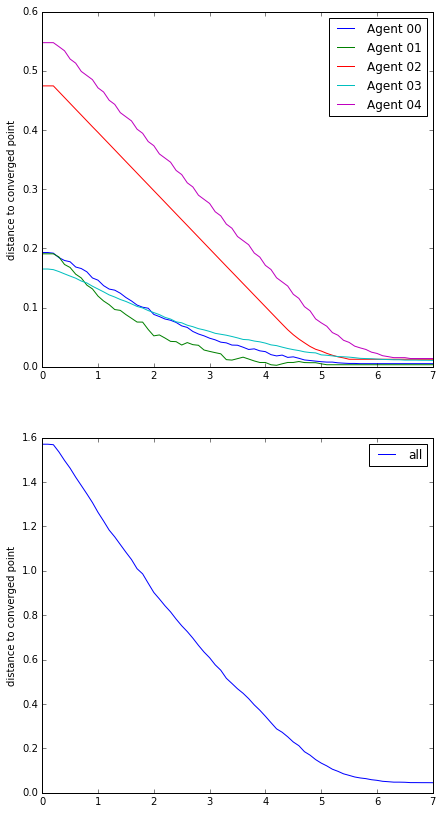

In [29]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 0.300
delays['t_delay_min'] = 0.100
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax'] = 0.100
delays['Tbufmin'] = 0.010

#############################
# Simpy Environment
env = simpy.Environment()
ListAgents = list()
env.ListOfAgents = ListAgents

# Copy Graph
G_copy = G.copy()

# Initilize Agents
for num in G_copy.nodes():
    ListAgents.append(Agent(num=num,
                            env=env,
                            node=G_copy.node[num],
                            Graph=G_copy,
                            fixed_delay=False,
                            fixed_Tbuf=False,
                            delays=delays
                           ))

# Initialize Observer
obsvr = logger(env=env,Graph=G_copy,T=0.1)

# Simulation
env.run(until=10)

# Analysis
obsvr.ConvergencePlot()
obsvr.showVideo("exp4")


## DES: Slow Network, Global Broadcast Gossip, simple Buffer ##

Agent #04 step 0000 Tbuf 0.018 (time:0.018) oldpos (0.91,0.08) newpos (0.91,0.08) filtered 00 unfiltered 00 packages
Agent #00 step 0000 Tbuf 0.026 (time:0.026) oldpos (0.59,0.71) newpos (0.59,0.71) filtered 00 unfiltered 00 packages
Agent #03 step 0000 Tbuf 0.076 (time:0.076) oldpos (0.42,0.50) newpos (0.42,0.50) filtered 00 unfiltered 00 packages
Agent #01 step 0000 Tbuf 0.079 (time:0.079) oldpos (0.54,0.34) newpos (0.54,0.34) filtered 00 unfiltered 00 packages
Agent #02 step 0000 Tbuf 0.082 (time:0.082) oldpos (0.60,1.00) newpos (0.60,1.00) filtered 00 unfiltered 00 packages
Agent #04 step 0050 Tbuf 0.018 (time:0.909) oldpos (0.91,0.09) newpos (0.91,0.09) filtered 00 unfiltered 00 packages
Agent #00 step 0050 Tbuf 0.026 (time:1.322) oldpos (0.60,0.69) newpos (0.60,0.69) filtered 00 unfiltered 00 packages
Agent #04 step 0100 Tbuf 0.018 (time:1.799) oldpos (0.89,0.10) newpos (0.89,0.10) filtered 00 unfiltered 00 packages
Agent #00 step 0100 Tbuf 0.026 (time:2.617) oldpos (0.61,0.65) n

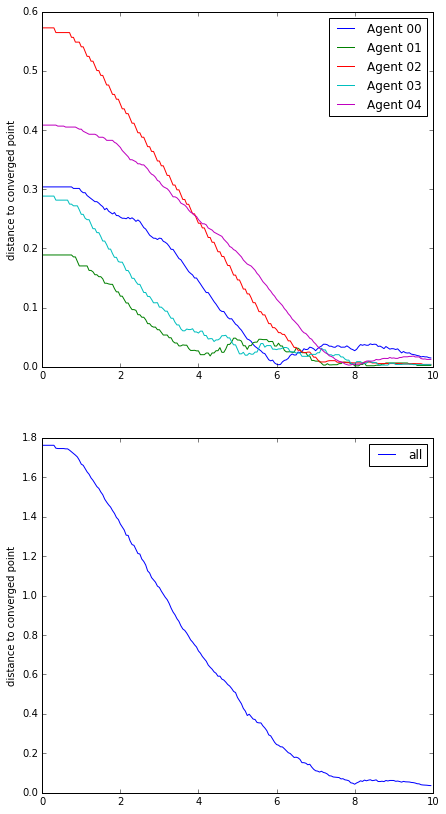

In [30]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 5.000 #s
delays['t_delay_min'] = 0.100 #s
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax'] = 0.100 #s
delays['Tbufmin'] = 0.010 #s

simulation_time = 12 #s

#############################
# Simpy Environment
env = simpy.Environment()
ListAgents = list()
env.ListOfAgents = ListAgents
env.sim_starts = env.event()

# Copy Graph
G_copy = G.copy()

# Initilize Agents
for num in G_copy.nodes():
    ListAgents.append(Agent(num=num,
                            env=env,
                            node=G_copy.node[num],
                            Graph=G_copy,
                            fixed_delay=False,
                            fixed_Tbuf=False,
                            delays=delays
                           ))

# Initialize Observer
obsvr = logger(env=env,Graph=G_copy,T=0.05)

# Simulation
env.run(until=simulation_time)

# Analysis
obsvr.ConvergencePlot()
obsvr.showVideo("exp4_long_delay")

## Geographic Gossip Subclass ##

In [31]:
import simpy
import random
import numpy as np
import pdb
from random import randint

class Agent_GeographicGossip(Agent):
    def send_messages(self):
        # Instead of: Talk to all, strongly connected graph
        # Changed to: Talk to a single target in whole network
        n_agents = len(self.env.ListOfAgents)
        #pdb.set_trace()
        
        rnd_target = randint(0,n_agents-1)
        while rnd_target==self.num:
            rnd_target = randint(0,n_agents-1)

        if self.fixed_delay:
            delay = self.G[self.num][rnd_target]['weight']
        else:
            delay = random.uniform(self.delays['t_delay_min'],self.delays['t_delay_max'])

        package = {'sender':self.num,
                   'arrival_time':self.env.now+delay,
                   'time_stamp':self.env.now,
                   'pos':self.node['pos']}
        self.env.ListOfAgents[rnd_target].add_package(package)

## DES: Geographic Gossip, simple Buffer (use newest Data) ##

Agent #00 step 0000 Tbuf 0.060 (time:0.060) oldpos (0.59,0.71) newpos (0.59,0.71) filtered 00 unfiltered 00 packages
Agent #02 step 0000 Tbuf 0.066 (time:0.066) oldpos (0.60,1.00) newpos (0.60,1.00) filtered 00 unfiltered 00 packages
Agent #01 step 0000 Tbuf 0.070 (time:0.070) oldpos (0.54,0.34) newpos (0.54,0.34) filtered 00 unfiltered 00 packages
Agent #03 step 0000 Tbuf 0.071 (time:0.071) oldpos (0.42,0.50) newpos (0.42,0.50) filtered 00 unfiltered 00 packages
Agent #04 step 0000 Tbuf 0.073 (time:0.073) oldpos (0.91,0.08) newpos (0.91,0.08) filtered 00 unfiltered 00 packages
Agent #00 step 0050 Tbuf 0.060 (time:3.051) oldpos (0.59,0.67) newpos (0.59,0.67) filtered 00 unfiltered 00 packages
Agent #02 step 0050 Tbuf 0.066 (time:3.361) oldpos (0.60,0.84) newpos (0.60,0.83) filtered 01 unfiltered 01 packages
Agent #01 step 0050 Tbuf 0.070 (time:3.594) oldpos (0.56,0.40) newpos (0.56,0.41) filtered 01 unfiltered 01 packages
Agent #03 step 0050 Tbuf 0.071 (time:3.645) oldpos (0.52,0.49) n

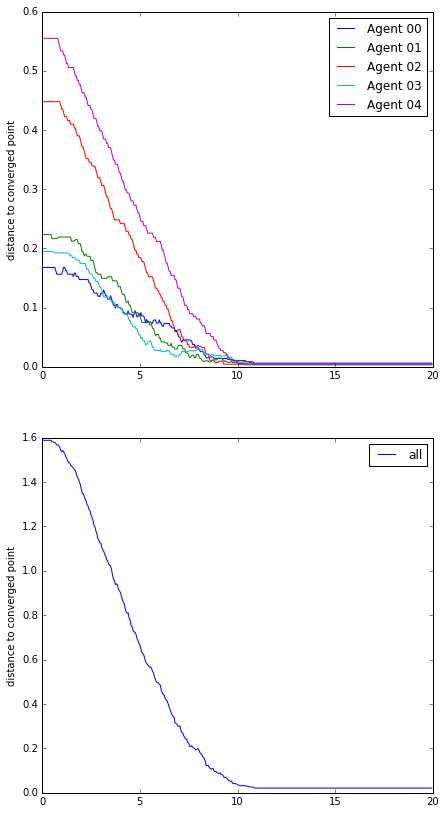

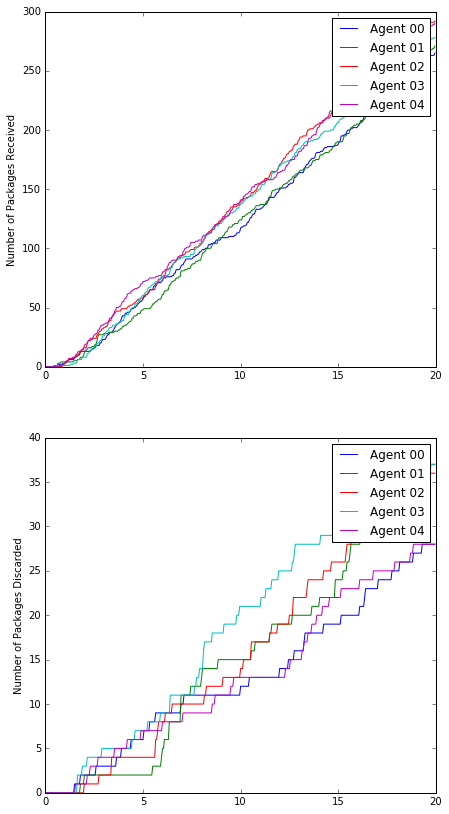

In [32]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 2.000 #s
delays['t_delay_min'] = 0.100 #s
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax'] = 0.100 #s
delays['Tbufmin'] = 0.010 #s

simulation_time = 20 #s

#############################
# Simpy Environment
env = simpy.Environment()
ListAgents = list()
env.ListOfAgents = ListAgents
env.sim_starts = env.event()

# Copy Graph
G_copy = G.copy()

# Initilize Agents
for num in G_copy.nodes():
    ListAgents.append(Agent_GeographicGossip(   num=num,
                                                env=env,
                                                node=G_copy.node[num],
                                                Graph=G_copy,
                                                fixed_delay=False,
                                                fixed_Tbuf=False,
                                                delays=delays
                                               ))

# Initialize Observer
obsvr = logger(env=env,Graph=G_copy,T=0.05)

# Simulation
env.run(until=simulation_time)

# Analysis
obsvr.ConvergencePlot()
obsvr.PkgPlot()
obsvr.showVideo("exp5_geographic_gossip")

##  Subclass for Extrapolation of Buffer Data ##
Estimates the actual state of the sending agent, if more than one package arrives within on time-step

In [33]:
import simpy
import random
import numpy as np
import pdb
from random import randint

class Agent_GeographicGossip_Extrapolation(Agent_GeographicGossip):
    def handle_buffer(self,current_buffer,n_packages_unfiltered):
        # Instead of: Deal with ambigious data, throw away old data
        # Changed to: Estimate the actual position linearly
        current_buffer_sender = sorted(current_buffer, key=lambda package: package['sender'])
        current_buffer_sender_filtered = list()
        i = 0
        while i < n_packages_unfiltered:
            sender_packages = [p for p in current_buffer_sender if p['sender'] == current_buffer_sender[i]['sender']]
            n_from_sender = len(sender_packages)
            if n_from_sender>1:
                #pdb.set_trace()
                # extrapolate
                first = min(sender_packages, key=lambda p:p['time_stamp'])
                last  = max(sender_packages, key=lambda p:p['time_stamp'])
                
                #dir_vec = np.array([0.,0.])
                first_pos = np.array(first['pos'])
                last_pos  = np.array(last['pos'])
                dir_vec = last_pos-first_pos
                
                deltat = last['time_stamp']-first['time_stamp']
                #deltat_now = self.env.now-first['time_stamp']
                
                # estimated current position
                estim_pos = list(first_pos+dir_vec*2)
                
                # adjust a package with the new information
                estim_package = last
                estim_package['pos'] = estim_pos
                estim_package['time_stamp'] = self.env.now
                
                # put it in the buffer for next process
                current_buffer_sender_filtered.append(estim_package)
            else:
                current_buffer_sender_filtered.extend(sender_packages)
            i += n_from_sender
        
        # update discarded count
        self.packets_discarded += n_packages_unfiltered-len(current_buffer_sender_filtered)
    
        return current_buffer_sender_filtered

## DES: Random Graph, Geographic Gossip, Extrapolating Buffer ## 

Agent #04 step 0000 Tbuf 0.033 (time:0.033) oldpos (0.91,0.08) newpos (0.91,0.08) filtered 00 unfiltered 00 packages
Agent #02 step 0000 Tbuf 0.045 (time:0.045) oldpos (0.60,1.00) newpos (0.60,1.00) filtered 00 unfiltered 00 packages
Agent #03 step 0000 Tbuf 0.069 (time:0.069) oldpos (0.42,0.50) newpos (0.42,0.50) filtered 00 unfiltered 00 packages
Agent #00 step 0000 Tbuf 0.077 (time:0.077) oldpos (0.59,0.71) newpos (0.59,0.71) filtered 00 unfiltered 00 packages
Agent #01 step 0000 Tbuf 0.100 (time:0.100) oldpos (0.54,0.34) newpos (0.54,0.34) filtered 00 unfiltered 00 packages
Agent #04 step 0050 Tbuf 0.033 (time:1.707) oldpos (0.89,0.11) newpos (0.89,0.11) filtered 00 unfiltered 00 packages
Agent #02 step 0050 Tbuf 0.045 (time:2.294) oldpos (0.61,0.96) newpos (0.61,0.96) filtered 00 unfiltered 00 packages
Agent #04 step 0100 Tbuf 0.033 (time:3.381) oldpos (0.85,0.16) newpos (0.85,0.16) filtered 00 unfiltered 00 packages
Agent #03 step 0050 Tbuf 0.069 (time:3.497) oldpos (0.55,0.50) n

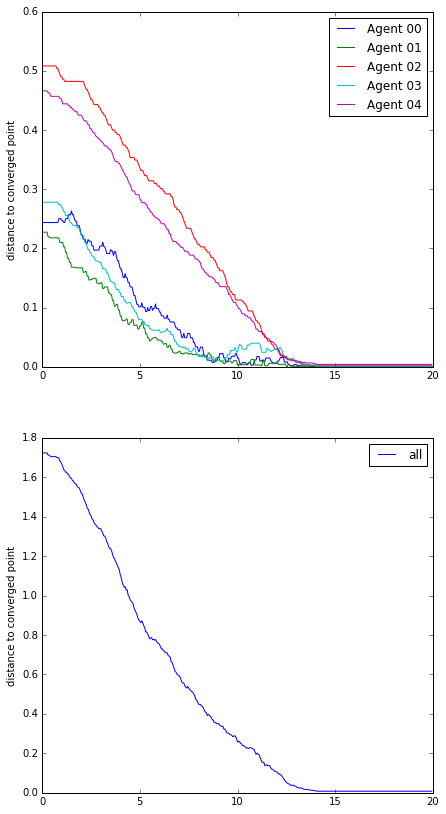

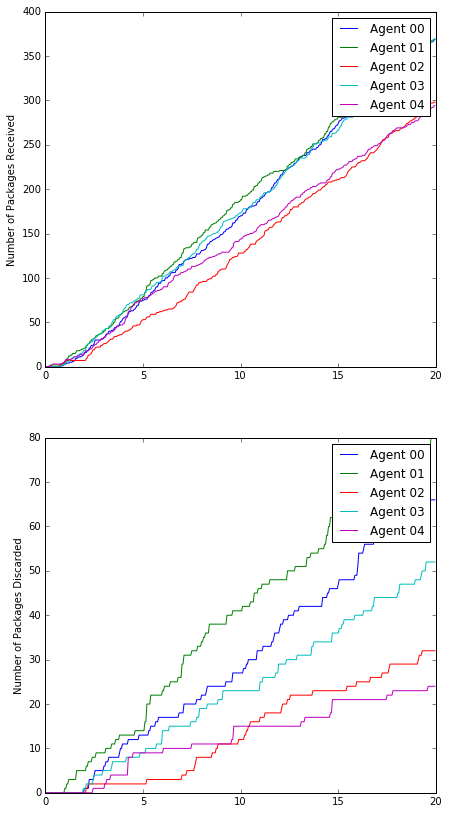

In [34]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 2.000 #s
delays['t_delay_min'] = 0.100 #s
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax'] = 0.100 #s
delays['Tbufmin'] = 0.010 #s

simulation_time = 20 #s

#############################
# Simpy Environment
env = simpy.Environment()
ListAgents = list()
env.ListOfAgents = ListAgents
env.sim_starts = env.event()

# Copy Graph
G_copy = G.copy()

# Initilize Agents
for num in G_copy.nodes():
    ListAgents.append(Agent_GeographicGossip_Extrapolation(     num=num,
                                                                env=env,
                                                                node=G_copy.node[num],
                                                                Graph=G_copy,
                                                                fixed_delay=False,
                                                                fixed_Tbuf=False,
                                                                delays=delays
                                                               ))

# Initialize Observer
obsvr = logger(env=env,Graph=G_copy,T=0.05)

# Simulation
env.run(until=simulation_time)

# Analysis
obsvr.ConvergencePlot()
obsvr.PkgPlot()
obsvr.showVideo("exp6_geographic_gossip_interpolation")

## Comparison: Simple vs Extrapolating Buffer ##

Results for 100 samples (in seconds):
	simple	extrapolated
avr	10.18	9.68
std	1.95	1.55
dR avr	14.82%
dR std	6.74%
with
{'t_delay_min': 0.1, 't_delay_max': 1.0, 'Tbufmax': 1.0, 'Tbufmin': 0.1}
dR is discarded ratio
[(number of all pkgs)/(number of all discarded pkgs) for all agents]


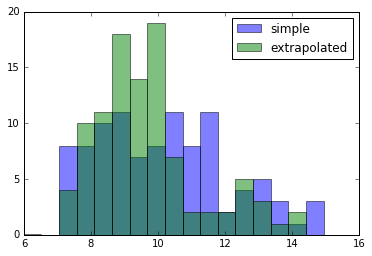

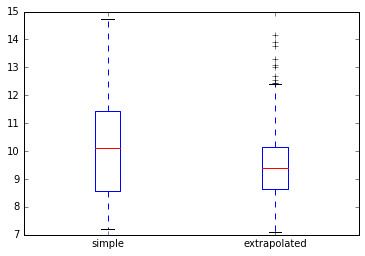

In [40]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 1.00 #s
delays['t_delay_min'] = 0.10 #s
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax']     = 1.00 #s
delays['Tbufmin']     = 0.10 #s

simulation_time = 16 #s

simulation_reps = 100
cons_t_naive = list()
cons_t_extrapol = list()
pkg_disc_recv_ratio_simple = list()
for i in range(0,simulation_reps):
    #############################
    # Simple Agent
    env = simpy.Environment()
    ListAgents = list()
    env.ListOfAgents = ListAgents

    # Copy Graph
    G_copy = G.copy()

    # Initilize Agents
    for num in G_copy.nodes():
        ListAgents.append(Agent_GeographicGossip(   num=num,
                                                    env=env,
                                                    node=G_copy.node[num],
                                                    Graph=G_copy,
                                                    fixed_delay=False,
                                                    fixed_Tbuf=False,
                                                    delays=delays,
                                                    quite=True
                                                   ))

    # Initialize Observer
    obsvr = logger(env=env,Graph=G_copy,T=0.05,MakeVideo=False)

    # Simulation
    env.run(until=simulation_time)

    # Analysis
    cons_t_naive.append(obsvr.CalculateConsensusTime())
    allpkg = np.sum([Agent.packets_received for Agent in env.ListOfAgents])
    allpkg_disc = np.sum([Agent.packets_discarded for Agent in env.ListOfAgents])
    pkg_disc_recv_ratio_simple.append(allpkg_disc/allpkg)
    #print(pkg_disc_recv_ratio_simple[-1])
    #############################
    
    #############################
    # Intelligent Agent, Extrapolation
    env = simpy.Environment()
    ListAgents = list()
    env.ListOfAgents = ListAgents

    # Copy Graph
    G_copy = G.copy()

    # Initilize Agents
    for num in G_copy.nodes():
        ListAgents.append(Agent_GeographicGossip_Extrapolation(     num=num,
                                                                    env=env,
                                                                    node=G_copy.node[num],
                                                                    Graph=G_copy,
                                                                    fixed_delay=False,
                                                                    fixed_Tbuf=False,
                                                                    delays=delays,
                                                                    quite=True
                                                                   ))

    # Initialize Observer
    obsvr = logger(env=env,Graph=G_copy,T=0.05,MakeVideo=False)

    # Simulation
    env.run(until=simulation_time)

    # Analysis
    cons_t_extrapol.append(obsvr.CalculateConsensusTime())
    
    #############################
    
    
#############################
# Analysis
import matplotlib.pyplot as plt
import numpy as np

print('Results for %d samples (in seconds):' % simulation_reps)
print('\tsimple\textrapolated')
print('avr\t%.2f\t%.2f' % (np.average(cons_t_naive),np.average(cons_t_extrapol)))
print('std\t%.2f\t%.2f' % (np.std(cons_t_naive),np.std(cons_t_extrapol)))
print('dR avr\t%.2f%%' % (np.average(pkg_disc_recv_ratio_simple)*100))
print('dR std\t%.2f%%' % (np.std(pkg_disc_recv_ratio_simple)*100))
print('with')
print(delays)
print('dR is discarded ratio')
print('[(number of all pkgs)/(number of all discarded pkgs) for all agents]')

bins = np.linspace(6, simulation_time, 20)

fig = plt.figure()
plt.hist(cons_t_naive, bins, alpha=0.5, label=['simple'])
plt.hist(cons_t_extrapol, bins, alpha=0.5, label=['extrapolated'])
plt.legend()
plt.show()

fig2 = plt.figure()
data = [cons_t_naive,cons_t_extrapol]
pos = np.array(range(2)) + 1
labels = ['simple','extrapolated']
plt.boxplot(data,positions=pos,labels=labels)
#plt.legend()
plt.show()


## Subclass: Keep Last State in Memory, update with newest Package ##

In [41]:
import simpy
import random
import numpy as np
import pdb
from random import randint

class Agent_GeographicGossip_KeepLast(Agent_GeographicGossip):
    def __init__(self, env, num, node, Graph,fixed_delay=True,fixed_Tbuf=True,delays=None,quite=False):
        Agent_GeographicGossip.__init__(self, env, num, node, Graph,fixed_delay,fixed_Tbuf,delays,quite)
        self.LastPkg = dict()

    def handle_buffer(self,current_buffer,n_packages_unfiltered):
        # Instead of: Deal with ambigious data, throw away old data
        # Changed to: Keep the last State in Memory, update when new info is received
        current_buffer_sender = sorted(current_buffer, key=lambda package: package['sender'])
        current_buffer_sender_filtered = list()
        i = 0
        #pdb.set_trace()
        while i < n_packages_unfiltered:
            current_sender = current_buffer_sender[i]['sender']
            sender_packages = [p for p in current_buffer_sender if p['sender'] == current_sender]
            n_from_sender = len(sender_packages)
            if n_from_sender>1:
                #pdb.set_trace()
                newest  = max(sender_packages, key=lambda p:p['time_stamp'])
                                
                # put it in the buffer for next process
                #current_buffer_sender_filtered.append(newest)
                self.LastPkg[current_sender] = [newest]
            else:
                #current_buffer_sender_filtered.extend(sender_packages)
                self.LastPkg[current_sender] = sender_packages
            i += n_from_sender
        
        # update discarded count
        self.packets_discarded += n_packages_unfiltered-len(current_buffer_sender_filtered)
        # assemble the buffer with the latest info
        #if len(self.LastPkg)>0:
        #    pdb.set_trace()
        for sender_id, last_package in self.LastPkg.items():
            current_buffer_sender_filtered.extend(last_package)
        return current_buffer_sender_filtered

## Comparison: Simple vs Keep Last Buffer ##

Results for 100 samples:
	simple	keep last
avr	10.01	9.23
std	1.58	2.37
dR avr	14.28%
dR std	6.26%
with
{'t_delay_min': 0.1, 't_delay_max': 1.0, 'Tbufmax': 1.0, 'Tbufmin': 0.1}


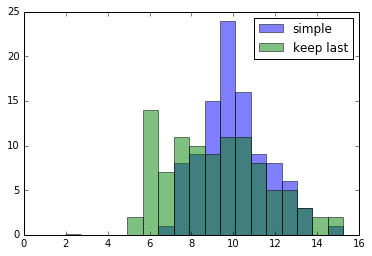

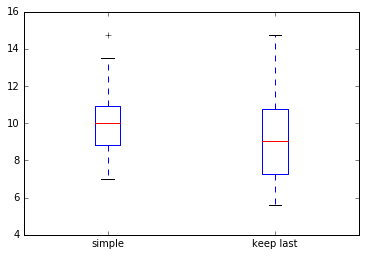

In [44]:
# Parameter
# Dict with all the delay information bounds
delays = dict()
# Channel time-delay of each agent is uniformly distributed and is upper and lower bounded 
delays['t_delay_max'] = 1.00 #s
delays['t_delay_min'] = 0.10 #s
# Iteration time of each agent is uniformly distributed and is upper and lower bounded 
delays['Tbufmax']     = 1.00 #s
delays['Tbufmin']     = 0.10 #s

simulation_time = 16 #s

simulation_reps = 100
cons_t_naive = list()
cons_t_keeplast = list()
pkg_disc_recv_ratio_simple = list()
for i in range(0,simulation_reps):
    #############################
    # Simple Agent
    env = simpy.Environment()
    ListAgents = list()
    env.ListOfAgents = ListAgents

    # Copy Graph
    G_copy = G.copy()

    # Initilize Agents
    for num in G_copy.nodes():
        ListAgents.append(Agent_GeographicGossip(   num=num,
                                                    env=env,
                                                    node=G_copy.node[num],
                                                    Graph=G_copy,
                                                    fixed_delay=False,
                                                    fixed_Tbuf=False,
                                                    delays=delays,
                                                    quite=True
                                                   ))

    # Initialize Observer
    obsvr = logger(env=env,Graph=G_copy,T=0.05,MakeVideo=False)

    # Simulation
    env.run(until=simulation_time)

    # Analysis
    cons_t_naive.append(obsvr.CalculateConsensusTime())
    allpkg = np.sum([Agent.packets_received for Agent in env.ListOfAgents])
    allpkg_disc = np.sum([Agent.packets_discarded for Agent in env.ListOfAgents])
    pkg_disc_recv_ratio_simple.append(allpkg_disc/allpkg)
    #print(pkg_disc_recv_ratio_simple[-1])
    #############################
    
    #############################
    # Intelligent Agent, Keep Last State
    env = simpy.Environment()
    ListAgents = list()
    env.ListOfAgents = ListAgents

    # Copy Graph
    G_copy = G.copy()

    # Initilize Agents
    for num in G_copy.nodes():
        ListAgents.append(Agent_GeographicGossip_KeepLast(          num=num,
                                                                    env=env,
                                                                    node=G_copy.node[num],
                                                                    Graph=G_copy,
                                                                    fixed_delay=False,
                                                                    fixed_Tbuf=False,
                                                                    delays=delays,
                                                                    quite=True
                                                                   ))

    # Initialize Observer
    obsvr = logger(env=env,Graph=G_copy,T=0.05,MakeVideo=False)

    # Simulation
    env.run(until=simulation_time)

    # Analysis
    cons_t_keeplast.append(obsvr.CalculateConsensusTime())
    
    #############################
    
    
#############################
# Analysis
import matplotlib.pyplot as plt
import numpy as np

print('Results for %d samples:\n\tsimple\tkeep last' % simulation_reps)
print('avr\t%.2f\t%.2f' % (np.average(cons_t_naive),np.average(cons_t_keeplast)))
print('std\t%.2f\t%.2f' % (np.std(cons_t_naive),np.std(cons_t_keeplast)))
print('dR avr\t%.2f%%' % (np.average(pkg_disc_recv_ratio_simple)*100))
print('dR std\t%.2f%%' % (np.std(pkg_disc_recv_ratio_simple)*100))
print('with')
print(delays)

bins = np.linspace(2, simulation_time, 20)

fig = plt.figure()
plt.hist(cons_t_naive, bins, alpha=0.5, label=['simple'])
plt.hist(cons_t_keeplast, bins, alpha=0.5, label=['keep last'])
plt.legend()
plt.show()

fig2 = plt.figure()
data = [cons_t_naive,cons_t_keeplast]
pos = np.array(range(2)) + 1
labels = ['simple','keep last']
plt.boxplot(data,positions=pos,labels=labels)
#plt.legend()
plt.show()
